In [88]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv('/content/drive/MyDrive/mushroom edibility classification dataset.csv')
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [89]:
#preprossing removing null value
df= df.dropna(axis=0, subset=["cap-shape","cap-color"])

In [90]:
#Endcoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['class'] = enc.fit_transform(df['class'])
df['bruises'] = enc.fit_transform(df['bruises'])
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,5.0,2,4.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,0,5.0,2,9.0,0,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,0,0.0,2,8.0,0,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,1,5.0,3,8.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,0,5.0,2,3.0,1,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [91]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

terget = df["class"].values   
dataset = df.drop(["class"], axis=1).values

In [92]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(dataset, terget, test_size=0.2, random_state=42)
x_train.shape

(2486, 19)

In [121]:
#Support Vector Machine 
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
predictionsSVC = svc.predict(x_test)
print("Accuracy using Support Vector Machine : {}%".format(round(accuracy_score(y_test, predictionsSVC)*100,2)) )
prePCAsvm=accuracy_score(y_test, predictionsSVC)*100

Accuracy using Support Vector Machine : 94.21%
94.21221864951768


In [122]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
predictionsRFC = rfc.predict(x_test)
print("Accuracy using Random Forest: {}%".format(round(accuracy_score(y_test, predictionsRFC)*100,2)) )
prePCArfc=accuracy_score(y_test, predictionsRFC)*100

Accuracy using Random Forest: 99.68%


In [123]:
#Neural Network 
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
predictionsNNC = nnc.predict(x_test)
print("Accuracy using Neural Network : {}%".format(round(accuracy_score(y_test, predictionsNNC)*100,2)) )
prePCAnnc=accuracy_score(y_test, predictionsNNC)*100

Accuracy using Neural Network : 99.84%


In [96]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df= pd.DataFrame(scaler.fit_transform(dataset))
df=df.assign(target=terget)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,target
0,-1.737406,0.807038,0.341747,-0.439567,-0.657965,1.048050,-1.328580,0.926108,0.395066,0.275042,0.475016,0.477947,0.0,0.0,0.0,0.589948,-0.788665,-0.194585,2.601773,1
1,-1.736295,0.807038,0.341747,1.564209,-0.657965,-2.275765,-1.328580,-0.065399,0.395066,0.275042,0.475016,0.477947,0.0,0.0,0.0,0.589948,0.679102,-0.851230,-0.104489,0
2,-1.735184,-2.064813,0.341747,1.163454,-0.657965,-0.613858,-1.328580,-0.065399,0.395066,0.275042,0.475016,0.477947,0.0,0.0,0.0,0.589948,0.679102,-0.851230,1.248642,0
3,-1.734072,0.807038,1.105334,1.163454,-0.657965,1.048050,-1.328580,0.926108,0.395066,0.275042,0.475016,0.477947,0.0,0.0,0.0,0.589948,-0.788665,-0.194585,2.601773,1
4,-1.732961,0.807038,0.341747,-0.840322,1.519837,0.494081,0.752683,0.926108,0.395066,0.275042,0.475016,0.477947,0.0,0.0,0.0,-1.729543,0.679102,-2.164521,-0.104489,0


In [97]:
#Dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
principal_compt=pca.fit_transform(scaler.fit_transform(dataset))
print(principal_compt.shape)

(3108, 9)


In [98]:
dataset.shape

(3108, 19)

In [99]:
principal_df = pd.DataFrame(data=principal_compt, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6","principle component 7","principle component 8","principle component 9"])
main_df=pd.concat([principal_df, df[["target"]]], axis=1)
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,principle component 8,principle component 9,target
0,-1.600591,-1.559875,-2.412495,-1.596243,0.550262,-0.028449,-0.067826,-0.111039,0.737695,1
1,-1.729476,-2.490744,1.343662,0.033217,-1.301588,1.579988,-0.384114,-0.170102,0.028671,0
2,-2.140327,-2.377235,0.783844,0.945352,1.266931,-0.280250,0.312297,0.013525,0.616270,0
3,-2.118040,-2.121633,-2.052135,-1.216687,-0.161224,-0.210741,0.017386,-0.135718,1.095159,1
4,-2.094631,1.709254,0.397361,-1.454183,-0.626358,-0.336358,-0.209197,-0.037578,-0.002056,0


In [100]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)
x_train.shape

(2486, 9)

In [124]:
from sklearn.svm import SVC
svc_2 = SVC(kernel="linear")
svc_2.fit(x_train, y_train)
predictionsSVCpca = svc_2.predict(x_test)
print("Accuracy using Support Vector Machine After PCA : {}%".format(round(accuracy_score(y_test, predictionsSVCpca)*100,2)) )
postPCAsvm=accuracy_score(y_test, predictionsSVCpca)*100

Accuracy using Support Vector Machine After PCA : 94.21%


In [125]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(n_estimators=50)
rfc_2.fit(x_train, y_train)
predictionsRFCpca = rfc_2.predict(x_test)
print("Accuracy using Random Forest After PCA: {}%".format(round(accuracy_score(y_test, predictionsRFCpca)*100,2)) )
postPCArfc=accuracy_score(y_test, predictionsRFCpca)*100

Accuracy using Random Forest After PCA: 99.52%


In [126]:
#Neural Network 
from sklearn.neural_network import MLPClassifier
nnc_2=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc_2.fit(x_train, y_train)
predictionsNNCpca = nnc_2.predict(x_test)
print("Accuracy using Neural Network After PCA : {}%".format(round(accuracy_score(y_test, predictionsNNCpca)*100,2)) )
postPCAnnc=accuracy_score(y_test, predictionsNNCpca)*100

Accuracy using Neural Network After PCA : 99.84%


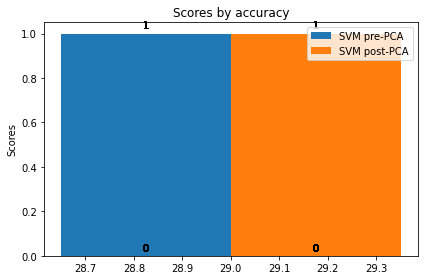

In [143]:
#Comparing the accuracy and plot them as a bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
v1 = predictionsSVC
v2 = predictionsSVCpca

# x = np.arange(len(labels))  # the label locations
LenOFv1 = np.sum(predictionsSVC)
LenOFv2 = np.sum(predictionsSVCpca)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(LenOFv1 - width/2, predictionsSVC, width, label='SVM pre-PCA')
rects2 = ax.bar(LenOFv2 + width/2, predictionsSVCpca, width, label='SVM post-PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by accuracy')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

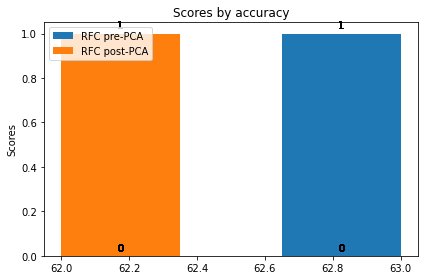

In [136]:
#Comparing the accuracy and plot them as a bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# x = np.arange(len(labels))  # the label locations
LenOFv3 = np.sum(predictionsRFC)
LenOFv4 = np.sum(predictionsRFCpca)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(LenOFv3 - width/2, predictionsRFC, width, label='RFC pre-PCA')
rects2 = ax.bar(LenOFv4 + width/2, predictionsRFCpca, width, label='RFC post-PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by accuracy')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

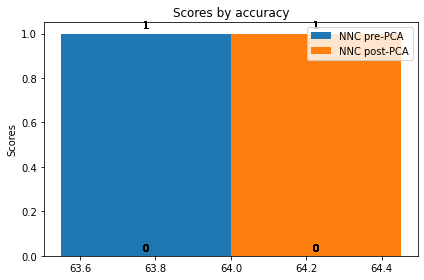

In [138]:
#Comparing the accuracy and plot them as a bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# x = np.arange(len(labels))  # the label locations
LenOFv5 = np.sum(predictionsNNC)
LenOFv6 = np.sum(predictionsNNCpca)
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(LenOFv5 - width/2, predictionsNNC, width, label='NNC pre-PCA')
rects2 = ax.bar(LenOFv6 + width/2, predictionsNNCpca, width, label='NNC post-PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by accuracy')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()